# Results From Conway Game of Life Simulations using CUDA


By: Justin Wijaya

## Directions for your instructor

Include detailed instructions for compiling and reproducing the results you have in this report.  Automate as much of the steps as possible to help speed up grading.


A good idea is to show your specific commands here in the jupyter notebook.  Use the exclamation point (!) to run bash commands inside of jupyter. For example:

In [ ]:
!make

## Serial Experiment

I compiled the serial code on amd20-v100 using the following commands:

```
!gcc -lm -lpng16 -c gameoflife.c
!gcc -lm -lpng16 -c png_util.c
!gcc -lm -lpng16 -o gol gameoflife.o png_util.o
```
This process is simplified by using the premade makefile:
```
!make
```

I ran the code 3 times with 
```
!echo "0 5" | time ./gol
```
Which is simplified by using the makefile test3:
```
!make test3
```
(note that this tests all 3 versions once)

and obtained the following results

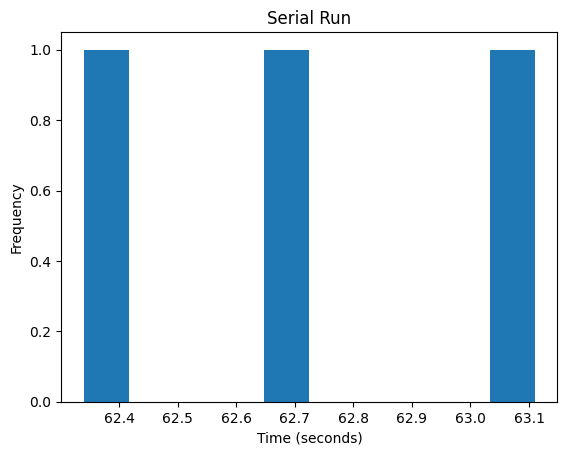

Serial code average runtime: 62.70333333333334 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tests = [1,2,3]
times1 = [63.11,62.34,62.66]
plt.hist(times1)
plt.title("Serial Run")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()
print("Serial code average runtime:",np.average(times1),"seconds")

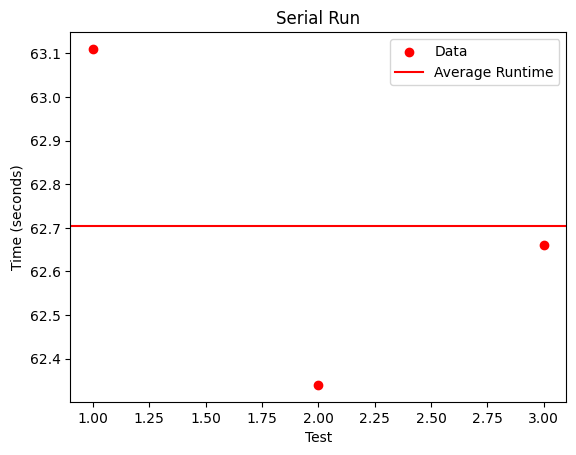

In [3]:
plt.scatter(tests,times1,color="red",label="Data")
plt.axhline(np.average(times1),color="red",label="Average Runtime")
plt.xlabel("Test")
plt.ylabel("Time (seconds)")
plt.title("Serial Run")
plt.legend()
plt.show()

## Compiler Optimization

Describe changes you made to the code compiler to try and make it go faster

* Compile using a different compiler option.
* Use 2 arrays instead of an array of 2 arrays to represent plate the input and output plates.

Show your timing results as either a table or a graph.

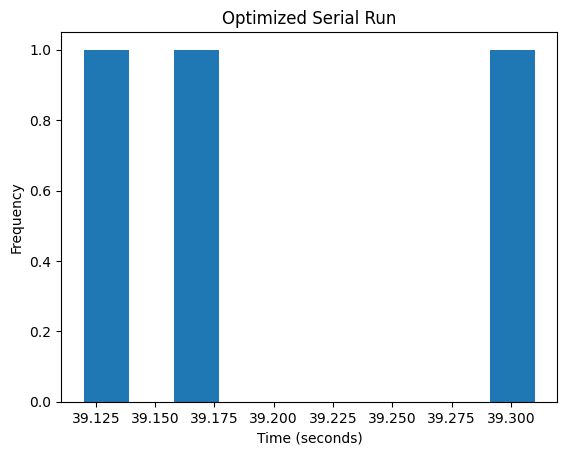

Optimized serial code average runtime: 39.2 seconds


In [4]:
times2 = [39.31,39.12,39.17]
plt.hist(times2)
plt.title("Optimized Serial Run")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()
print("Optimized serial code average runtime:",np.average(times2),"seconds")

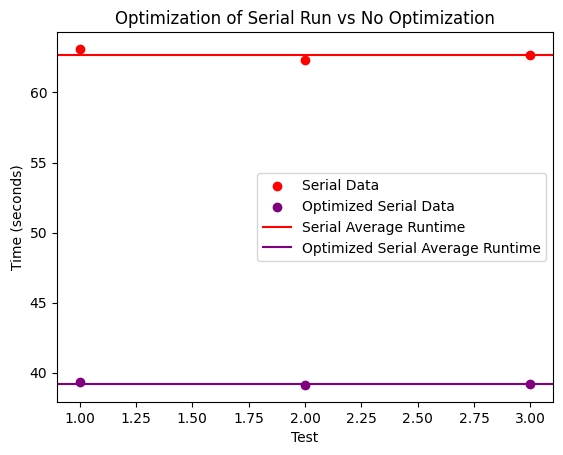

In [5]:
plt.scatter(tests,times1,color="red",label="Serial Data")
plt.scatter(tests,times2,color="purple",label="Optimized Serial Data")
plt.axhline(np.average(times1),color="red",label="Serial Average Runtime")
plt.axhline(np.average(times2),color="purple",label="Optimized Serial Average Runtime")
plt.xlabel("Test")
plt.ylabel("Time (seconds)")
plt.title("Optimization of Serial Run vs No Optimization")
plt.legend()
plt.show()

## CUDA Speedup

Describe what you did to speed up your code using CUDA

* CUDA-fy the iteration function as it is the only function to actually update the values in the plate.
* Implement live function into kernel to utilize the threads already initialized within the kernel for its computation.

Show your timing results as either a table or a graph.

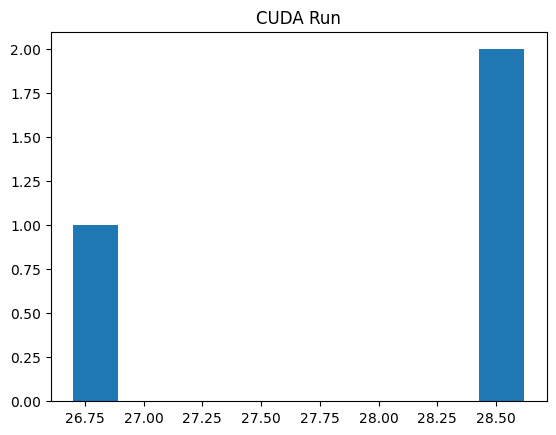

In [8]:
times3 = [28.45,28.62,26.70]
plt.hist(times3)
plt.title("CUDA Run")
plt.show()

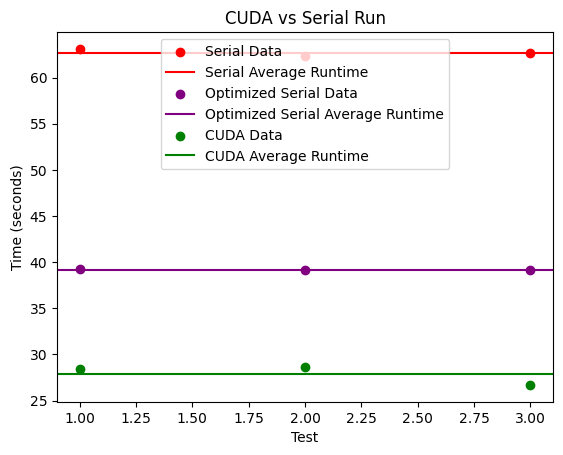

CUDA code average runtime: 27.923333333333332 seconds


In [7]:
plt.scatter(tests,times1,color="red",label="Serial Data")
plt.axhline(np.average(times1),color="red",label="Serial Average Runtime")
plt.scatter(tests,times2,color="purple",label="Optimized Serial Data")
plt.axhline(np.average(times2),color="purple",label="Optimized Serial Average Runtime")
plt.scatter(tests,times3,color="green",label="CUDA Data")
plt.axhline(np.average(times3),color="green",label="CUDA Average Runtime")
plt.xlabel("Test")
plt.ylabel("Time (seconds)")
plt.title("CUDA vs Serial Run")
plt.legend()
plt.show()
print("CUDA code average runtime:",np.average(times3),"seconds")

## Concluding Discussion

Describe what you learned during this process, what worked, what didn't work, where did you have trouble and what you learned

- I learned that sometimes breaking down a complex structure into its more basic components can help in the speedup of code. I also learned that CUDA-fying serial code is a very painful process as there's so much to consider.
- What worked was breaking down the 2D array into 2 1D arrays to represent the input and output plates. That made CUDA-fying a lot easier.
- What didn't work was stubbornly trying to maintain the 2D array structure throughout the CUDA code.
- I had trouble with the submission script because it was killing the process. I learned that I had gave it too little memory, so once I upgraded the amount requested by the script, it produced the correct output.

----

In the folder, the outputs for these programs are .png files. The files have the naming scheme:
- plate[]{}.png
    - [] represents the specific version used to create the image. 0 is serial, 1 is optimized serial, and 2 is CUDA version.
    - {} represents the test ran to create the image. 1 means that it was created through the ./gol < data.txt method, 3 means that it was created through the echo "0 5" | ./gol method.
        - 3 is a sample output as the method involves randomization.